In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors
import random

In [2]:
df = pd.read_csv('agent_1_data.csv')

In [3]:
c = []
x_train = []
for i in range(len(df)):
    arr = np.fromstring(df['x'][i].replace('[', '').replace(']', ''), dtype=int, sep='\n').reshape(3,3)
    arr = arr/arr.max()
    c.append(np.asarray(arr))
x_train = np.asarray(c)
x_train = np.asarray(x_train)
x_train.shape
#     print(arr.shape)
#     print(arr)

(29162, 3, 3)

In [4]:
out = []
for i in range(len(df)):
    a = df['y'][i].replace('[', '').replace(']', '').replace(',','').split()
    a = [int(m) for m in a]
    out.append(np.asarray(a))
y_train = out
y_train = np.asarray(out)
y_train

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

In [5]:
a = []
for i in (y_train):
    row = list(i).index(1)
    a.append(row)
y_train = np.asarray(a)

    # y_train[0]

In [6]:
#sequential is the basic model
# model = tf.keras.models.Sequential()


# # we add hidden layers into our network. 128 is the number of neurons that we use
# # relu is a basic activation sigmoid function
# # softmax is used for probability distribution (used in final/output layer with 10 neurons)
# # we reduce 28x28 array to a flatten layer as it is multidimensional and hard to compute
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
# model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
# model.add(tf.keras.layers.Dense(4, activation = tf.nn.softmax))

# # #parameters for training for the model

# model.compile(optimizer = 'adam',
#               loss = 'sparse_categorical_crossentropy',
#               metrics = ['accuracy'])

model = tf.keras.models.load_model(
    'epic_num_reader.model', custom_objects=None, compile=True, options=None
)

print('x_train', x_train.shape)
print('\ny_train', y_train.shape)
model.fit(x_train,y_train, epochs = 10)

x_train (29162, 3, 3)

y_train (29162,)
Epoch 1/10
912/912 [==============================] - 2s 1ms/step - loss: 0.8016 - accuracy: 0.6872
Epoch 2/10
912/912 [==============================] - 1s 1ms/step - loss: 0.3361 - accuracy: 0.9009
Epoch 3/10
912/912 [==============================] - 1s 1ms/step - loss: 0.2199 - accuracy: 0.9295
Epoch 4/10
912/912 [==============================] - 1s 1ms/step - loss: 0.1850 - accuracy: 0.9361
Epoch 5/10
912/912 [==============================] - 1s 2ms/step - loss: 0.1688 - accuracy: 0.9398
Epoch 6/10
912/912 [==============================] - 1s 1ms/step - loss: 0.1634 - accuracy: 0.9396
Epoch 7/10
912/912 [==============================] - 1s 1ms/step - loss: 0.1600 - accuracy: 0.9400
Epoch 8/10
912/912 [==============================] - 1s 1ms/step - loss: 0.1568 - accuracy: 0.9415
Epoch 9/10
912/912 [==============================] - 1s 1ms/step - loss: 0.1554 - accuracy: 0.9402
Epoch 10/10
912/912 [==============================] - 1s 1m

In [7]:
# calculate the validation loss
val_loss, val_accuracy = model.evaluate(x_train, np.asarray(y_train))
print(val_loss, val_accuracy)

912/912 [==============================] - 1s 1ms/step - loss: 0.1475 - accuracy: 0.9444
0.14745239913463593 0.9443796873092651


In [8]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [9]:
def get_children(x, y, n, visited_list):
    """
    This function is used to return children of a particular node
    x: row value of current node
    y: column value of current node
    n: size of maze
    gofn: g(n) value of current node
    visited_list: list of nodes that are already visited
    matrix: maze
    agent_matrix: matrix of the agent that holds the information of updated environment
    """
    allChildren = [(x+1,y),#down
                   (x-1,y),#up
                   (x,y+1),#right
                   (x,y-1)]#left
    if x+1 > n-1:
        allChildren.remove((x+1,y))
    if x-1 < 0:
        allChildren.remove((x-1,y))
    if y+1 > n-1:
        allChildren.remove((x,y+1))
    if y-1 < 0:
        allChildren.remove((x,y-1))
#     allChildren = [node for node in allChildren if node[:2] not in visited_list]

    return allChildren

In [10]:
# next_move((0,0), np.asarray([[0.1947099 , 0.3240646,  0.27810824, 0.20311731]]))

In [11]:
def populateMatrix(n,p):
    """
    This function returns randomly populated maze
    p: probabillity density of each cell
    n: size of the maze
    """
    global block_unblock_matrix
    np_array = np.random.rand(n*n)
    block = lambda x: 0 if x>=p else 1
    vectorized_block = np.vectorize(block)
    np_array = vectorized_block(np_array).reshape(n,n)
    np_array[0,0]=0
    np_array[n-1,n-1] =0
    block_unblock_matrix = np.asmatrix(np_array)


    block_unblock_matrix = np.matrix(block_unblock_matrix)
    plt.spy(block_unblock_matrix)
    return block_unblock_matrix


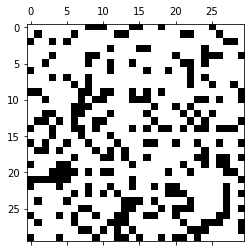

In [12]:
maze_size = 30
agent_grid_world = np.full((maze_size, maze_size),3)
agent_grid_world = np.asmatrix(agent_grid_world)
full_grid_world = populateMatrix(maze_size, 0.3)
plt.spy(full_grid_world)

In [13]:
def next_move(current_node, predictions, full_grid_world, visited_list, maze_size, trajectory, flag, agent_grid_world):
    message = ''
    print('current_node -- (next_move)', current_node)
    indices = zip(np.where(predictions[0] == predictions[0].max()))

#     print(predictions[0])
    for row in indices:
        print(row)
        if row[0][0] == 0:
            message = 'up'
            print(message)
            next_node = (current_node[0] - 1, current_node[1])
        elif row[0][0] == 1:
            message = 'down'
            print(message)
            next_node = (current_node[0] + 1, current_node[1])
        elif row[0][0] == 2:
            message = 'left'
            print(message)
            next_node = (current_node[0], current_node[1] - 1)
        elif row[0][0] == 3:
            message = 'right'
            print(message)
            next_node = (current_node[0], current_node[1] + 1)

    if next_node[0] > maze_size-1 or next_node[1] > maze_size-1 or next_node in visited_list:
        children = get_children(current_node[0], current_node[1], maze_size, visited_list)
        i = random.randint(0,len(children)-1)
        return children[i], message
    
    if agent_grid_world[next_node] == 2:
        print("entered blocked node")
        children = get_children(current_node[0], current_node[1], maze_size, visited_list)
        print('children', children)
        i = random.randint(0,len(children)-1)
        print('next_node out changed from:', next_node, 'to ', children[i])
        return children[i], message

    print('next_node out::',next_node)
    return next_node, message

In [14]:
def get_neighbors(row, col, n):
    dir = [[-1, -1], [-1, 0],[-1, 1], [0, -1], [0, 0],  [0, 1], [1, -1], [1, 0], [1, 1]]
    friend = []
    count = 0
    for x, y in dir:
        row_new = row + x
        col_new = col + y
        if (row_new>=0 and row_new<=(n-1)) and (col_new>=0 and col_new<=(n-1)):
            count += 1
            friend.append((row_new, col_new))
    return count, friend

In [15]:
def get_window(current_node, agent_grid_world, full_grid_world):
    a = []
    b = []
    count, neighbors = get_neighbors(current_node[0],current_node[1], maze_size)

    if len(neighbors) == 4:
        if current_node == (0,0):
            count, neighbors = get_neighbors(1,1, maze_size)
        elif current_node == (0,maze_size-1):
            count, neighbors = get_neighbors(1,maze_size-2, maze_size)
        elif current_node == (maze_size-1,0):
            count, neighbors = get_neighbors(maze_size-2, 1, maze_size)
        elif current_node == (maze_size-1,maze_size-1):
            count, neighbors = get_neighbors(maze_size-2,maze_size-2, maze_size)
    elif len(neighbors) == 6:
        if current_node[0] == 0:
            count, neighbors = get_neighbors(current_node[0] + 1,current_node[1], maze_size)
        elif current_node[0] == maze_size-1:
            count, neighbors = get_neighbors(current_node[0] - 1,current_node[1], maze_size)
        elif current_node[1] == 0:
            count, neighbors = get_neighbors(current_node[0],current_node[1] + 1, maze_size)
        elif current_node[1] == maze_size-1:
            count, neighbors = get_neighbors(current_node[0],current_node[1] - 1, maze_size)
    for i in neighbors:
        a.append(agent_grid_world[i])
        b.append(full_grid_world[i])
    window = np.asarray(a).reshape(3,3)
    print('neighbors', neighbors)
    print("full grid:", np.asarray(b).reshape(3,3))

    return window

neighbors [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
full grid: [[0 0 0]
 [0 1 0]
 [1 0 0]]
[[1 3 3]
 [3 3 3]
 [3 3 3]]
free
current_node -- (next_move) (0, 0)
(array([1], dtype=int64),)
down
next_node out:: (1, 0)
next_node out (1, 0)
message down
neighbors [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
full grid: [[0 0 0]
 [0 1 0]
 [1 0 0]]
[[1 3 3]
 [1 3 3]
 [3 3 3]]
free
current_node -- (next_move) (1, 0)
(array([3], dtype=int64),)
right
next_node out:: (1, 1)
next_node out (1, 1)
message right
neighbors [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
full grid: [[0 0 0]
 [0 1 0]
 [1 0 0]]
[[1 3 3]
 [1 1 3]
 [3 3 3]]
blocked
next node::::  (1, 0)
neighbors [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
full grid: [[0 0 0]
 [0 1 0]
 [1 0 0]]
[[1 3 3]
 [1 2 3]
 [3 3 3]]
free
current_node -- (next_move) (1, 0)
(array([3], dtype=int64),)
right
next_node out (2, 0)
message right
ne

blocked
next node::::  (0, 1)
neighbors [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
full grid: [[0 0 0]
 [0 1 0]
 [1 0 0]]
[[1 1 3]
 [1 2 3]
 [2 3 3]]
free
current_node -- (next_move) (0, 1)
(array([1], dtype=int64),)
down
next_node out (0, 2)
message down
neighbors [(0, 1), (0, 2), (0, 3), (1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3)]
full grid: [[0 0 0]
 [1 0 0]
 [0 0 1]]
[[1 1 3]
 [2 3 3]
 [3 3 3]]
free
current_node -- (next_move) (0, 2)
(array([1], dtype=int64),)
down
next_node out:: (1, 2)
next_node out (1, 2)
message down
neighbors [(0, 1), (0, 2), (0, 3), (1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3)]
full grid: [[0 0 0]
 [1 0 0]
 [0 0 1]]
[[1 1 3]
 [2 1 3]
 [3 3 3]]
free
current_node -- (next_move) (1, 2)
(array([3], dtype=int64),)
right
next_node out:: (1, 3)
next_node out (1, 3)
message right
neighbors [(0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4)]
full grid: [[0 0 0]
 [0 0 0]
 [0 1 0]]
[[1 3 3]
 [1 1 3]
 [3 3 3]]
free

free
current_node -- (next_move) (2, 12)
(array([3], dtype=int64),)
right
next_node out:: (2, 13)
next_node out (2, 13)
message right
neighbors [(1, 12), (1, 13), (1, 14), (2, 12), (2, 13), (2, 14), (3, 12), (3, 13), (3, 14)]
full grid: [[1 1 0]
 [0 0 0]
 [0 0 0]]
[[2 3 3]
 [1 1 3]
 [3 3 3]]
free
current_node -- (next_move) (2, 13)
(array([3], dtype=int64),)
right
next_node out:: (2, 14)
next_node out (2, 14)
message right
neighbors [(1, 13), (1, 14), (1, 15), (2, 13), (2, 14), (2, 15), (3, 13), (3, 14), (3, 15)]
full grid: [[1 0 0]
 [0 0 0]
 [0 0 1]]
[[3 3 3]
 [1 1 3]
 [3 3 3]]
free
current_node -- (next_move) (2, 14)
(array([3], dtype=int64),)
right
next_node out:: (2, 15)
next_node out (2, 15)
message right
neighbors [(1, 14), (1, 15), (1, 16), (2, 14), (2, 15), (2, 16), (3, 14), (3, 15), (3, 16)]
full grid: [[0 0 0]
 [0 0 0]
 [0 1 1]]
[[3 3 3]
 [1 1 3]
 [3 3 3]]
free
current_node -- (next_move) (2, 15)
(array([3], dtype=int64),)
right
next_node out:: (2, 16)
next_node out (2, 16)
m

free
current_node -- (next_move) (3, 27)
(array([3], dtype=int64),)
right
next_node out (3, 28)
message right
neighbors [(2, 27), (2, 28), (2, 29), (3, 27), (3, 28), (3, 29), (4, 27), (4, 28), (4, 29)]
full grid: [[1 1 0]
 [0 0 0]
 [0 0 1]]
[[2 2 3]
 [1 1 1]
 [1 1 2]]
free
current_node -- (next_move) (3, 28)
(array([1], dtype=int64),)
down
next_node out (3, 27)
message down
neighbors [(2, 26), (2, 27), (2, 28), (3, 26), (3, 27), (3, 28), (4, 26), (4, 27), (4, 28)]
full grid: [[0 1 1]
 [0 0 0]
 [1 0 0]]
[[1 2 2]
 [1 1 1]
 [3 1 1]]
free
current_node -- (next_move) (3, 27)
(array([3], dtype=int64),)
right
next_node out (4, 27)
message right
neighbors [(3, 26), (3, 27), (3, 28), (4, 26), (4, 27), (4, 28), (5, 26), (5, 27), (5, 28)]
full grid: [[0 0 0]
 [1 0 0]
 [0 0 0]]
[[1 1 1]
 [3 1 1]
 [3 3 3]]
free
current_node -- (next_move) (4, 27)
(array([3], dtype=int64),)
right
next_node out (4, 26)
message right
neighbors [(3, 25), (3, 26), (3, 27), (4, 25), (4, 26), (4, 27), (5, 25), (5, 26), (5

free
current_node -- (next_move) (17, 25)
(array([1], dtype=int64),)
down
next_node out:: (18, 25)
next_node out (18, 25)
message down
neighbors [(17, 24), (17, 25), (17, 26), (18, 24), (18, 25), (18, 26), (19, 24), (19, 25), (19, 26)]
full grid: [[1 0 0]
 [1 0 1]
 [1 0 1]]
[[3 1 3]
 [3 1 3]
 [3 3 3]]
free
current_node -- (next_move) (18, 25)
(array([1], dtype=int64),)
down
next_node out:: (19, 25)
next_node out (19, 25)
message down
neighbors [(18, 24), (18, 25), (18, 26), (19, 24), (19, 25), (19, 26), (20, 24), (20, 25), (20, 26)]
full grid: [[1 0 1]
 [1 0 1]
 [0 0 0]]
[[3 1 3]
 [3 1 3]
 [3 3 3]]
free
current_node -- (next_move) (19, 25)
(array([1], dtype=int64),)
down
next_node out:: (20, 25)
next_node out (20, 25)
message down
neighbors [(19, 24), (19, 25), (19, 26), (20, 24), (20, 25), (20, 26), (21, 24), (21, 25), (21, 26)]
full grid: [[1 0 1]
 [0 0 0]
 [0 0 0]]
[[3 1 3]
 [3 1 3]
 [3 3 3]]
free
current_node -- (next_move) (20, 25)
(array([1], dtype=int64),)
down
next_node out:: (

blocked
next node::::  (21, 28)
neighbors [(20, 27), (20, 28), (20, 29), (21, 27), (21, 28), (21, 29), (22, 27), (22, 28), (22, 29)]
full grid: [[1 1 0]
 [0 0 1]
 [1 0 0]]
[[3 3 3]
 [1 1 2]
 [3 3 3]]
free
current_node -- (next_move) (21, 28)
(array([3], dtype=int64),)
right
next_node out (22, 28)
message right
neighbors [(21, 27), (21, 28), (21, 29), (22, 27), (22, 28), (22, 29), (23, 27), (23, 28), (23, 29)]
full grid: [[0 0 1]
 [1 0 0]
 [1 0 1]]
[[1 1 2]
 [3 1 3]
 [3 3 3]]
free
current_node -- (next_move) (22, 28)
(array([3], dtype=int64),)
right
next_node out:: (22, 29)
next_node out (22, 29)
message right
neighbors [(21, 27), (21, 28), (21, 29), (22, 27), (22, 28), (22, 29), (23, 27), (23, 28), (23, 29)]
full grid: [[0 0 1]
 [1 0 0]
 [1 0 1]]
[[1 1 2]
 [3 1 1]
 [3 3 3]]
free
current_node -- (next_move) (22, 29)
(array([3], dtype=int64),)
right
next_node out (22, 28)
message right
neighbors [(21, 27), (21, 28), (21, 29), (22, 27), (22, 28), (22, 29), (23, 27), (23, 28), (23, 29)]
fu

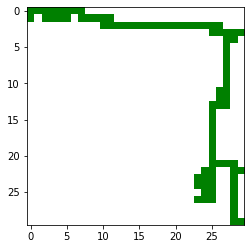

Goal reached!!!
189


In [16]:
goal_reached = False
new_model = tf.keras.models.load_model('epic_num_reader.model')

start = (0,0)
goal = (maze_size-1, maze_size-1)
agent_grid_world.itemset(start, 4)
current_node = start
visited_list = []
trajectory = []

while goal_reached == False:
    trajectory.append(current_node)
    agent_grid_world.itemset(current_node, 1)
    if current_node == goal:
        colormap = colors.ListedColormap(["green","white"])
        plt.imshow(agent_grid_world, cmap=colormap)
        plt.show()
        print('Goal reached!!!')
        goal_reached = True
        break

    if current_node not in visited_list:
        visited_list.append(current_node)

    x_test = get_window(current_node, agent_grid_world, full_grid_world)
    print(x_test)
    x_test = np.asarray(x_test)

    predictions = new_model.predict(np.asarray([x_test]))

    if full_grid_world.item(current_node) == 1:
#         trajectory.pop(-1)
        agent_grid_world.itemset(current_node, 2)
        flag = 'blocked'
        print(flag)
    else:
        agent_grid_world.itemset(current_node, 1)
        flag = 'free'
        print(flag)
    
    if flag == 'free':
        try:
            next_node, message = next_move(current_node, predictions, full_grid_world, visited_list, maze_size, trajectory, flag, agent_grid_world)
            current_node = next_node
        except Exception as err:
            print(err)
            print('No path to goal')
            break
        print('next_node out',next_node)
        print('message', message)
        if message == "Can't reach goal":
            print('Cannot reach goal')
            break

    if flag == 'blocked':
        current_node = trajectory[-2]
        print('next node:::: ', current_node)

    agent_grid_world.itemset(current_node, 4)

print(len(trajectory))

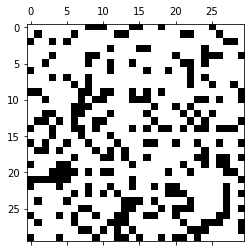

In [17]:
plt.spy(full_grid_world)

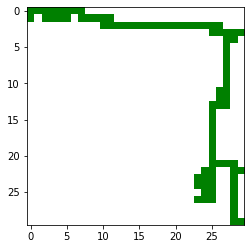

In [18]:
colormap = colors.ListedColormap(["green","white"])
plt.imshow(agent_grid_world, cmap=colormap)
plt.show()

In [21]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model\assets
